<a href="https://colab.research.google.com/github/Akshaysurtel/Commander/blob/main/Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import numpy as np
import pandas.tseries
plt.style.use('fivethirtyeight')

In [ ]:
mydata = pd.read_csv('diet.csv')

In [ ]:
mydata.head()

,id,gender,age,height,diet,preWeight,weight6weeks
0,1,Female,22,159,A,58,54.2
1,2,Female,46,192,A,60,54.0
2,3,Female,55,170,A,64,63.3
3,4,Female,33,171,A,64,61.1
4,5,Female,50,170,A,65,62.2


In [ ]:
print('Percentage of missing values in the dataset: {:.2f}%'.format(mydata[mydata.gender == ' '].size / mydata.size * 100))

Percentage of missing values in the dataset: 0.00%


<ipython-input-9-2f4e454a0211>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( mydata.weight6weeks )


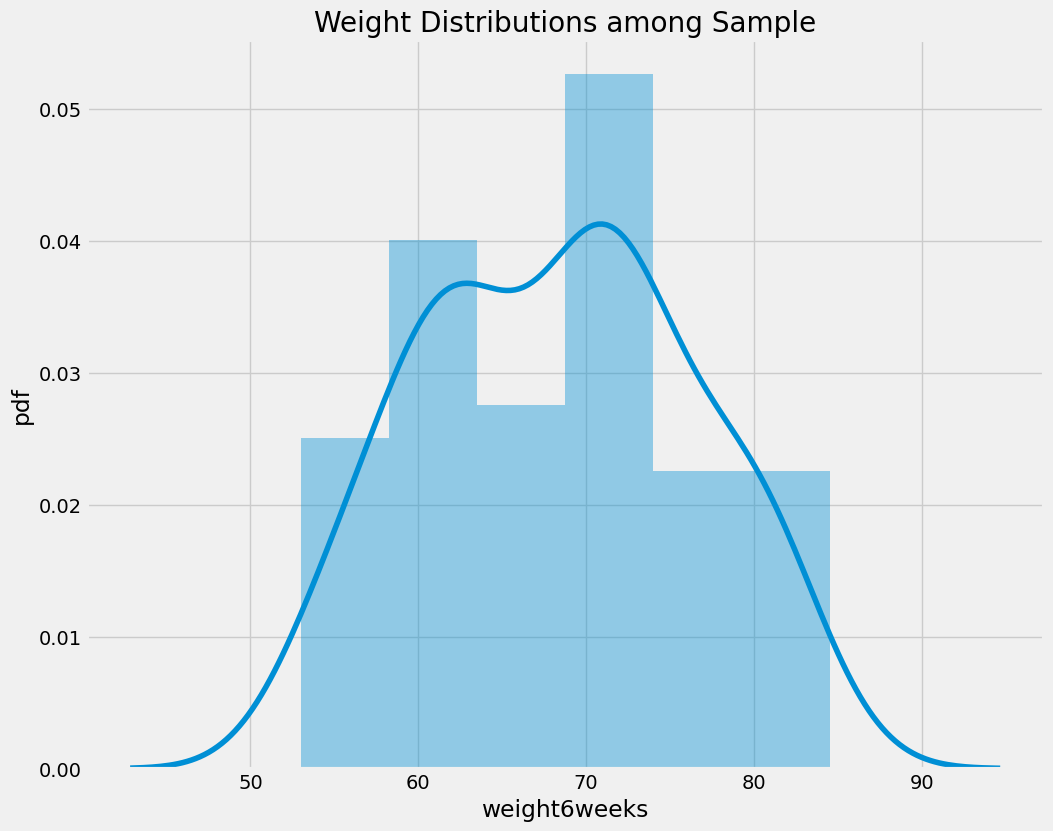

In [ ]:
f, ax = plt.subplots( figsize = (11,9) )
plt.title( 'Weight Distributions among Sample' )
plt.ylabel( 'pdf' )
sns.distplot( mydata.weight6weeks )
plt.show()

<ipython-input-13-ea8e3fa3ae50>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( mydata[mydata.gender == 'Male'].weight6weeks, ax = ax, label = 'Male')
<ipython-input-13-ea8e3fa3ae50>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( mydata[mydata.gender == 'Female'].weight6weeks, ax = ax, labe

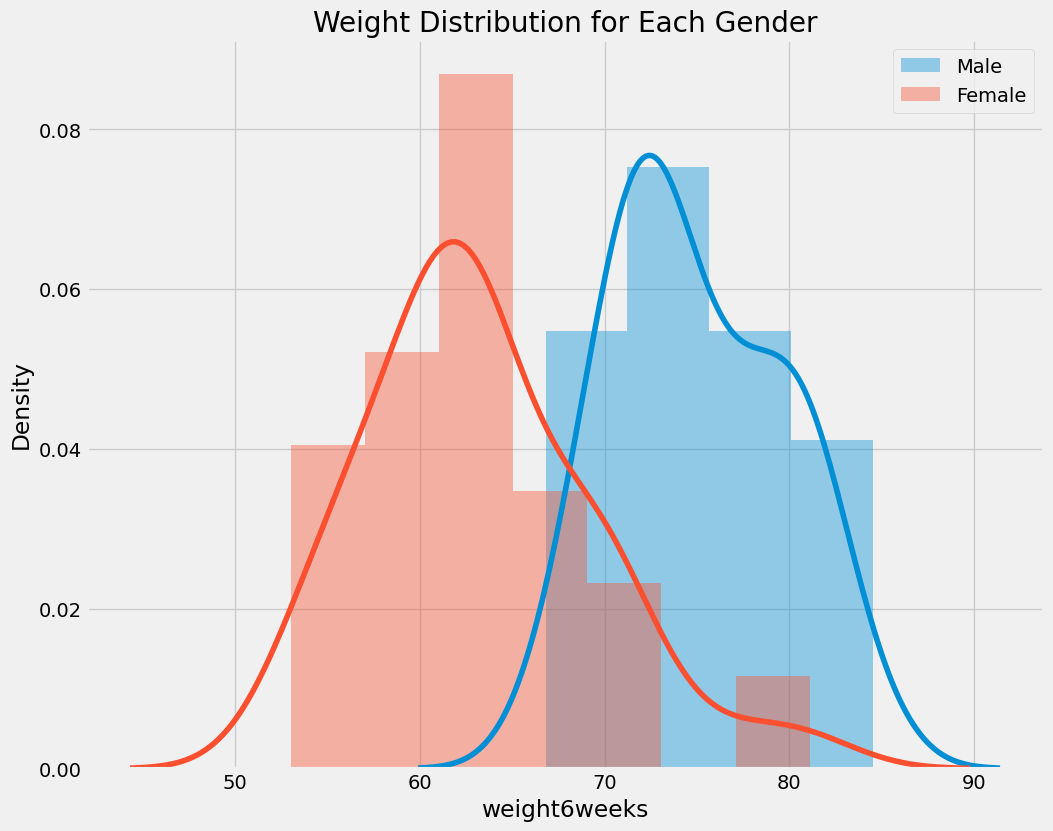

In [ ]:
f, ax = plt.subplots( figsize = (11,9) )
sns.distplot( mydata[mydata.gender == 'Male'].weight6weeks, ax = ax, label = 'Male')
sns.distplot( mydata[mydata.gender == 'Female'].weight6weeks, ax = ax, label = 'Female')
plt.title( 'Weight Distribution for Each Gender' )
plt.legend()
plt.show()

In [ ]:
def infergender(x):
    if x == 'Male':
        return 'Male'

    if x == 'Female':
        return 'Female'

    return 'Other'

def showdistribution(df, gender, column, group):
    f, ax = plt.subplots( figsize = (11, 9) )
    plt.title( 'Weight Distribution for {} on each {}'.format(gender, column) )
    for groupmember in group:
        sns.histplot(df[df[column] == groupmember].weight6weeks, label='{}'.format(groupmember))
    plt.legend()
    plt.show()

uniquediet = mydata.diet.unique()
uniquegender = mydata.gender.unique()

for gender in uniquegender:
    if gender != ' ':
        showdistribution(mydata[mydata.gender == gender], infergender(gender), 'diet', uniquediet)

NameError: name 'mydata' is not defined

In [ ]:
print(mydata.groupby('gender').agg(
    [ np.mean, np.median, np.count_nonzero, np.std ]
).weight6weeks)

             mean  median  count_nonzero       std
gender                                            
Female  63.223256    62.4             43  6.150874
Male    75.015152    73.9             33  4.629398


<ipython-input-17-748a6dd57ac3>:1: FutureWarning: ['diet'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  print(mydata.groupby('gender').agg(


In [ ]:
print(mydata.groupby(['gender', 'diet']).agg(
    [np.mean, np.median, np.count_nonzero, np.std]
).weight6weeks)

                  mean  median  count_nonzero       std
gender diet                                            
Female A     64.878571   64.50             14  6.877296
       B     62.178571   61.15             14  6.274635
       C     62.653333   61.80             15  5.370537
Male   A     76.150000   75.75             10  5.439414
       B     73.163636   72.70             11  3.818448
       C     75.766667   76.35             12  4.434848


In [ ]:
mymod = ols('height ~ diet', data = mydata[mydata.gender == 'Female']).fit()
# performing type 2 anova test
aovtable = sm.stats.anova_lm(mymod, typ = 2)
print('ANOVA table for Female')
print('----------------------')
print(aovtable)
print()

mod = ols('height ~ diet', data = mydata[mydata.gender=='Male']).fit()
# performing type 2 anova test
aovtable = sm.stats.anova_lm(mymod, typ = 2)
print('ANOVA table for Male')
print('----------------------')
print(aovtable)

ANOVA table for Female
----------------------
               sum_sq    df         F    PR(>F)
diet       565.938870   2.0  3.548397  0.038139
Residual  3189.828571  40.0       NaN       NaN

ANOVA table for Male
----------------------
               sum_sq    df         F    PR(>F)
diet       565.938870   2.0  3.548397  0.038139
Residual  3189.828571  40.0       NaN       NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
# using the female data only
mydf = mydata[mydata.gender == 'Female']

# comparing the height between each diet, using 95% confidence interval
multiComp = MultiComparison(mydf['height'], mydf['diet'])
tukeyres = multiComp.tukeyhsd(alpha = 0.05)

print(tukeyres)
print('Unique diet groups: ', multiComp.groupsunique)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B  -3.5714 0.5452 -11.7865  4.6436  False
     A      C  -8.7714 0.0307 -16.8484 -0.6944   True
     B      C     -5.2 0.2715  -13.277   2.877  False
-----------------------------------------------------
Unique diet groups:  ['A' 'B' 'C']
